In [1]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/siddheshshaji/Downloads/archive/base.csv')
df1 = pd.read_csv('/Users/siddheshshaji/Downloads/archive/base1.csv')
df2 = pd.read_csv('/Users/siddheshshaji/Downloads/archive/base2.csv')
df3 = pd.read_csv('/Users/siddheshshaji/Downloads/archive/base3.csv')
df4 = pd.read_csv('/Users/siddheshshaji/Downloads/archive/base4.csv')
df5 = pd.read_csv('/Users/siddheshshaji/Downloads/archive/base5.csv')

In [3]:
df1_ones = df1[df1['fraud_bool'] == 1] 
df2_ones = df2[df2['fraud_bool'] == 1] 
df3_ones = df3[df3['fraud_bool'] == 1] 
df4_ones = df4[df4['fraud_bool'] == 1] 
df5_ones = df5[df5['fraud_bool'] == 1] 

In [4]:
final_df = pd.concat([df, df1_ones, df2_ones, df3_ones, df4_ones, df5_ones], ignore_index=True)

In [5]:
dfd = final_df.drop_duplicates(keep='first')

In [6]:
dfd = dfd.drop(['device_fraud_count', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', \
          'velocity_4w', 'month', 'x1', 'x2'], axis=1)

In [7]:
dfd.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'intended_balcon_amount', 'payment_type',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'employment_status', 'credit_risk_score', 'email_is_free',
       'housing_status', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'source', 'session_length_in_minutes', 'device_os',
       'keep_alive_session', 'device_distinct_emails_8w'],
      dtype='object')

# Features that need binning: bank_branch_count_8w, prev_address_months_count, current_address_months_count
    

# Binning for bank_branch_count_8w

In [11]:
f = list(dfd['bank_branch_count_8w'].unique())
f.sort()
f

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [13]:
ones = []
zeroes = []
f = list(dfd['bank_branch_count_8w'].unique())
f.sort()

for i in f:
    zeroes.append(len(dfd[(dfd['bank_branch_count_8w']==i) & (dfd['fraud_bool']==0)]))
    ones.append(len(dfd[(dfd['bank_branch_count_8w']==i) & (dfd['fraud_bool']==1)]))

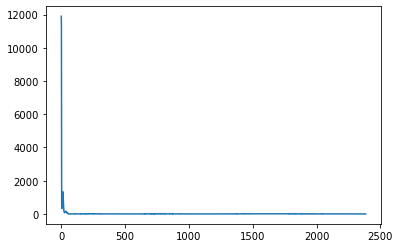

In [14]:
plt.plot(f, ones)

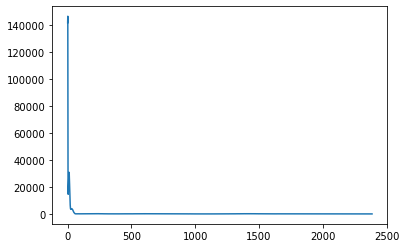

In [15]:
plt.plot(f, zeroes)

In [10]:
#len(dfd[(dfd['bank_branch_count_8w']==0) & (dfd['fraud_bool']==1)])

11899

In [16]:
bins = [-1, 10, 100, 5000]
group_names = [1,2,3]
dfd['bank_branch_count_8w'] = pd.cut(dfd['bank_branch_count_8w'], bins, labels=group_names)

In [24]:
dfd['bank_branch_count_8w'].unique()

[1, 3, 2]
Categories (3, int64): [1 < 2 < 3]

# Binning for prev_address_months_count

In [19]:
dfd['prev_address_months_count'].unique()

array([ -1,  92, 172,  28, 289,  35,  55, 194, 103,  27,  34,  58,  61,
        12,  57,  53,  96,  30, 111,  26,  86,  64,  18, 234,  97,  56,
        54, 125, 110,  65, 217,  93, 126,  25,  33,  80,  99,  45, 104,
        87,  49,  62, 282, 101, 135, 154,  36,  14,  91,  83,  10,  32,
        51, 325, 333, 159,  11, 318, 109, 152, 288, 102, 336, 202, 225,
       118, 115, 319, 201,  47,  37, 241,  60,  13, 165,  66,  94,  95,
        98,  59,  29,  89,  16, 304, 211, 314,  22,  31,  63, 321, 141,
       112,  52, 151, 142,   9,  50, 173,  90, 307, 106,  78,  24, 195,
       310,   8, 146, 284,  85,  44, 160,  23, 100,  38,  48, 327, 140,
       105, 122,  67, 127,  21, 119,   7, 156, 179,  88, 107,  82,  42,
       145, 324,  39, 306, 339, 209, 294,  72,  79, 246, 114,  84, 137,
        46, 188, 220, 139,  74, 312, 239,  75,  20, 161, 168, 290,  68,
       187, 303, 116, 230, 297,  77, 203, 181, 177,  41, 291, 123, 124,
       108, 295, 308, 133, 183, 278,  43, 121, 130, 328, 113, 18

In [25]:
ones = []
zeroes = []
f = list(dfd['prev_address_months_count'].unique())
f.sort()

for i in f:
    zeroes.append(len(dfd[(dfd['prev_address_months_count']==i) & (dfd['fraud_bool']==0)]))
    ones.append(len(dfd[(dfd['prev_address_months_count']==i) & (dfd['fraud_bool']==1)]))

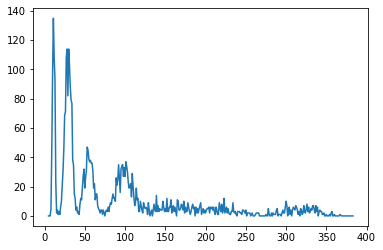

In [29]:
plt.plot(f[1:], ones[1:])

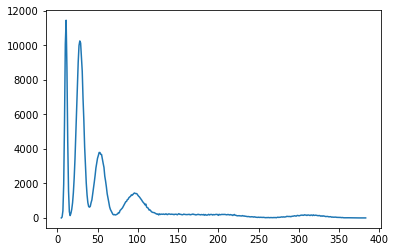

In [30]:
plt.plot(f[1:], zeroes[1:])

In [33]:
bins = [-2, 25, 50, 120, 200, 5000]
group_names = [1,2,3,4,5]
dfd['prev_address_months_count'] = pd.cut(dfd['prev_address_months_count'], bins, labels=group_names)

In [34]:
dfd['prev_address_months_count'].unique()

[1, 3, 4, 2, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

# Binning for current_address_months_count


In [35]:
dfd['current_address_months_count'].unique()

array([ 88, 144, 132,  22, 218,  30, 152,  18,  64,  60, 131, 109, 107,
       123,  37,  55, 173,  50,  94, 153,  82,   9,  19, 184,  56,   5,
        90,  78,   3, 162,  34, 112,  23,  99,  44,  51, 140,  62,  98,
       135, 209,  72, 229, 185,  14,  71, 239, 183,  16, 141, 186,  26,
        63, 142,  80, 199, 119,   8,   2, 118, 272, 306, 216, 212,  48,
       151, 189, 117, 124, 203, 130,  29, 176, 120,  57, 104, 247, 143,
       128, 149,   0, 122, 129, 360, 106, 170, 101,  15,  74, 220, 363,
       236, 159,  69,  93,  27,  12, 356, 146,   6,  36,  32,  83, 273,
       155,  45, 349,  41,  17, 361, 188,  79,  -1, 171, 111, 138,  68,
       169, 175,  47,  39, 160, 113,  13,   7, 270,  25, 274, 296, 377,
        38,  35,  54,  89, 105,  11, 156, 167,  33, 194, 290, 145,  31,
       381, 215,  43, 136,  61, 178,  42,  85,  84,  58,  49, 102,  76,
       103, 177,   1,  73, 126,  70, 139, 181, 250, 366, 125, 121, 137,
       147,  66, 154, 328,  52, 232, 295, 100,  87, 257,  65, 32

In [36]:
ones = []
zeroes = []
f = list(dfd['current_address_months_count'].unique())
f.sort()

for i in f:
    zeroes.append(len(dfd[(dfd['current_address_months_count']==i) & (dfd['fraud_bool']==0)]))
    ones.append(len(dfd[(dfd['current_address_months_count']==i) & (dfd['fraud_bool']==1)]))

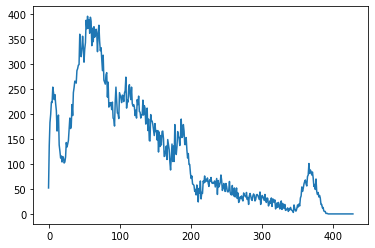

In [38]:
plt.plot(f, ones)

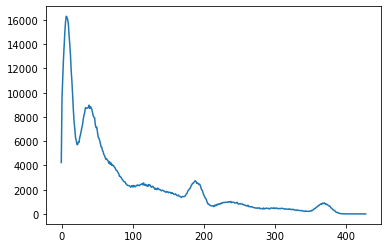

In [39]:
plt.plot(f, zeroes)

In [40]:
bins = [-2, 25, 100, 200, 350, 5000]
group_names = [1,2,3,4,5]
dfd['current_address_months_count'] = pd.cut(dfd['current_address_months_count'], bins, labels=group_names)

In [41]:
dfd['current_address_months_count'].unique()

[2, 3, 1, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

# One Hot Encoding

In [42]:
df_ohe = pd.get_dummies(
    dfd, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None
)

# df_ohe.to_csv('new_output_ohe.csv', index = False)
# dfd.to_csv('new_output.csv', index = False)

In [45]:
df_ohe.columns

Index(['fraud_bool', 'income', 'name_email_similarity', 'customer_age',
       'intended_balcon_amount', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w',
       'prev_address_months_count_2', 'prev_address_months_count_3',
       'prev_address_months_count_4', 'prev_address_months_count_5',
       'current_address_months_count_2', 'current_address_months_count_3',
       'current_address_months_count_4', 'current_address_months_count_5',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'bank_branch_count_8w_2', 'bank_branch_count_8w_3',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',

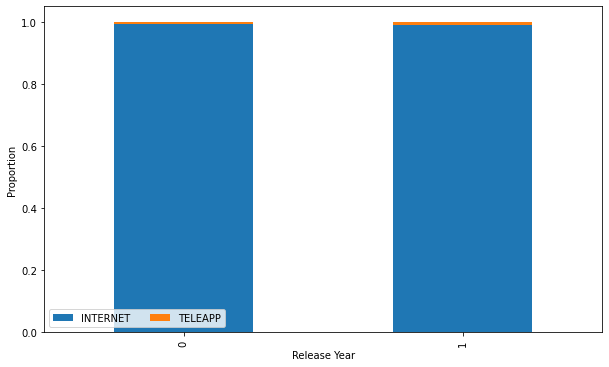

In [43]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['source'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

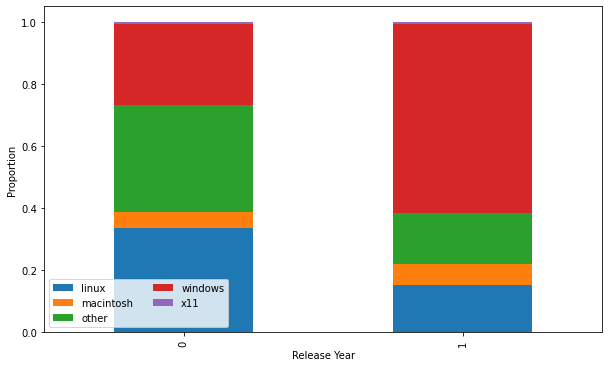

In [44]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['device_os'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

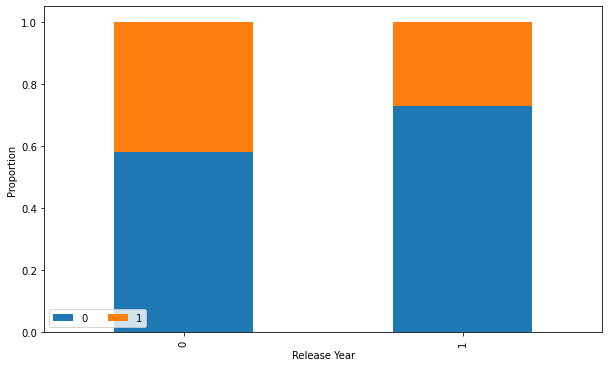

In [45]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['phone_home_valid'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

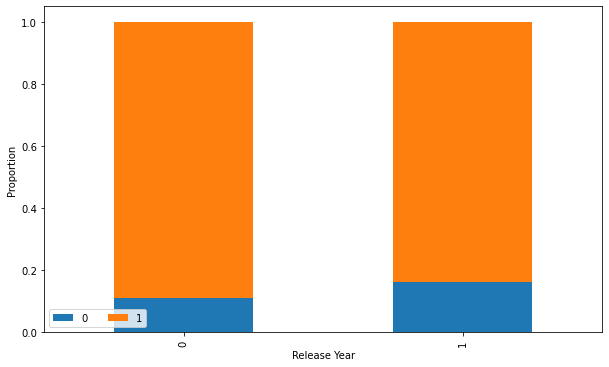

In [46]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['phone_mobile_valid'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

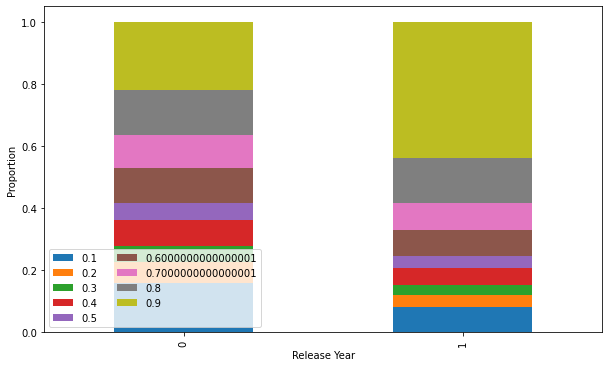

In [47]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['income'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

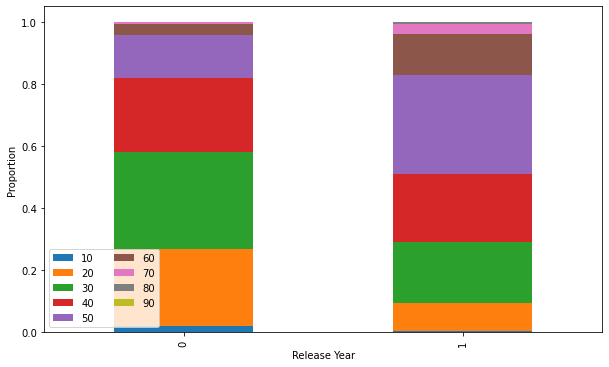

In [281]:
    cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                                 columns=dfd['customer_age'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

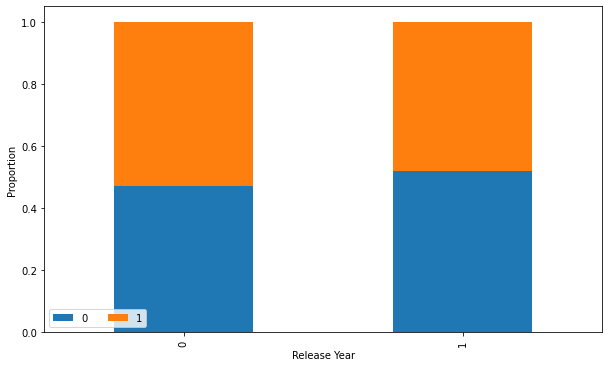

In [239]:
cross_tab_prop = pd.crosstab(index=df_final['fraud_bool'],
                             columns=df_final['email_is_free'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

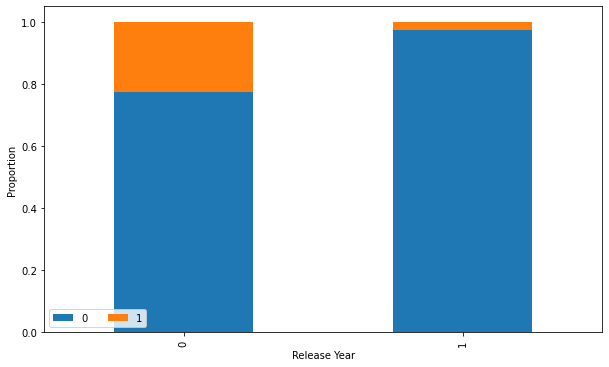

In [243]:
cross_tab_prop = pd.crosstab(index=df_final['fraud_bool'],
                             columns=df_final['has_other_cards'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

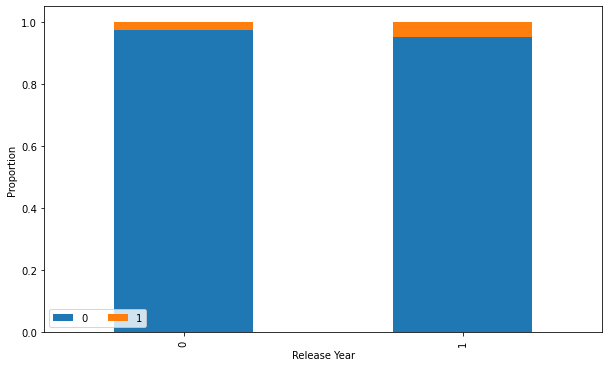

In [51]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['foreign_request'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

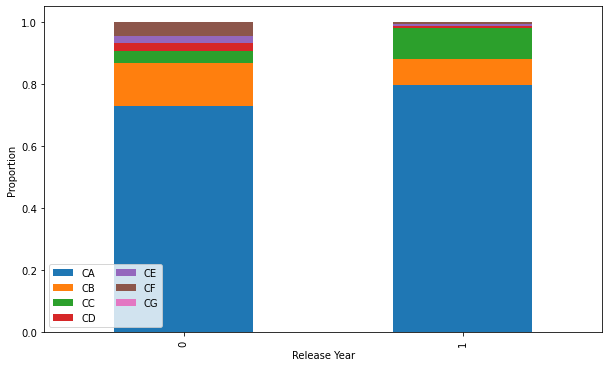

In [52]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['employment_status'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

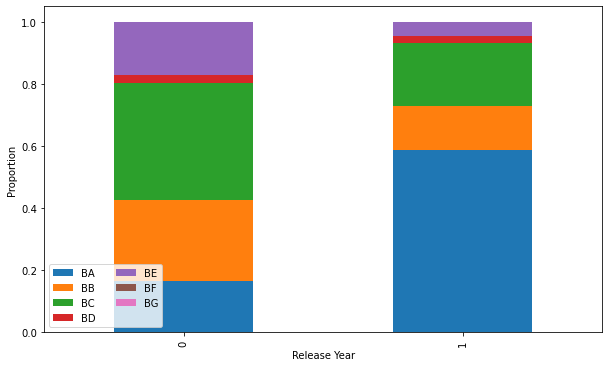

In [53]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['housing_status'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

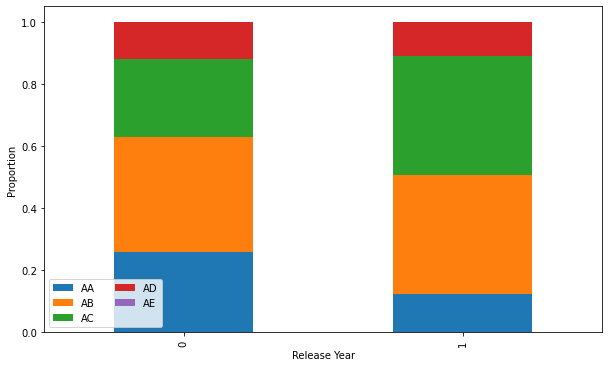

In [54]:
cross_tab_prop = pd.crosstab(index=dfd['fraud_bool'],
                             columns=dfd['payment_type'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

# SMOTE for oversampling the postive cases

In [46]:
x = df_ohe.iloc[:,1:]
y = df_ohe['fraud_bool']

In [49]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(x, y)

In [50]:
print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1039371, 47)
Shape of X after SMOTE: (1977942, 47)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: fraud_bool, dtype: float64

In [52]:
df_final = pd.concat([X_sm, y_sm], axis=1)

In [55]:
df_final['customer_age'].unique()

array([50, 40, 30, 20, 70, 60, 80, 10, 90, 54, 29, 32, 53, 31, 41, 24, 56,
       43, 37, 46, 72, 49, 45, 58, 28, 76, 47, 69, 38, 57, 36, 13, 33, 35,
       48, 23, 62, 59, 64, 78, 15, 22, 16, 39, 19, 27, 18, 66, 77, 71, 65,
       61, 34, 21, 81, 42, 73, 52, 51, 26, 44, 55, 74, 85, 25, 67, 68, 79,
       11, 75, 17, 63, 14, 88, 87, 12, 82, 89, 83, 84, 86])

In [56]:
df_final['customer_age'] = df_final['customer_age'].map(lambda x: round(x/10)*10)

In [57]:
df_final['customer_age'].unique()

array([50, 40, 30, 20, 70, 60, 80, 10, 90])

In [58]:
#df_final.to_csv('final_bankfraud_df.csv', index = False)